## Environment

You can see the [code](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) and [configurations](https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L53) of CartPole-v0 from OpenAI's repository.

In [1]:
import os
import random
from typing import Dict, List, Tuple

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
from rl.agent import DQNAgent

In [2]:
from gymjsp.jsspenv import HeuristicJsspEnv
env = HeuristicJsspEnv("ft06")

## Set random seed

In [3]:
seed = 777

def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
random.seed(seed)
seed_torch(seed)
env.seed(seed)

## Initialize

In [28]:
# parameters

num_frames = 20000
memory_size = 10000
batch_size = 64
target_update = 300
noisy = False

# train
agent = DQNAgent(env, memory_size, batch_size, target_update, noisy=noisy)

cuda


## Train

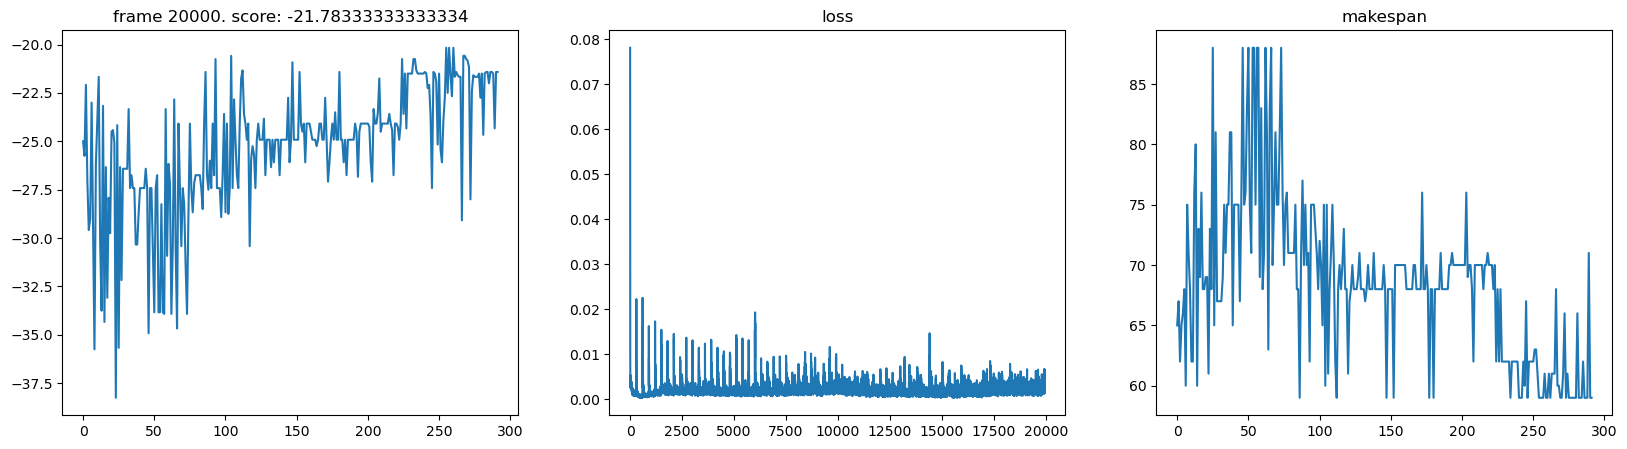

n episodes is 292


In [29]:
agent.train(num_frames, plotting_interval=5000)

## Test

Run the trained agent (1 episode).

In [30]:
trained_dqn = agent.test()

score:  -21.41666666666667
makespan:  59


#### 动态测试

In [31]:
trained_dqn

Dueling_Network(
  (feature_layer): Sequential(
    (0): Linear(in_features=360, out_features=128, bias=True)
    (1): ReLU()
  )
  (advantage_layer): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=8, bias=True)
  )
  (value_layer): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [32]:
from ortools_scheduler import ORtools_scheduler
scheduler = ORtools_scheduler("ft06")
scheduler.optimize()

In [33]:
scheduler.compare_dqn_ortools(model=trained_dqn, n=100, prob=0.2, scale=3)

(63.85, 58.11)

In [34]:
scheduler.compare_dqn_ortools(model=trained_dqn, n=100, prob=0.5, scale=5)

(71.42, 65.65)

In [35]:
scheduler.compare_dqn_ortools(model=trained_dqn, n=100, prob=0.5, scale=8)

(82.54, 73.96)